In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
sales_data = pd.read_csv("sales.csv").copy()
shops = pd.read_csv("shops.csv").copy()

In [4]:
sales_data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [5]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [6]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [7]:
sales_data.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

# Data Preprocessing

In [8]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [9]:
# convert date column to datetime variable 

sales_data["date"] = pd.to_datetime(sales_data["date"], format = "%d.%m.%Y")

In [10]:
sales_data

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0
2935845,2015-10-09,33,25,7460,299.00,1.0
2935846,2015-10-14,33,25,7459,349.00,1.0
2935847,2015-10-22,33,25,7440,299.00,1.0


In [11]:
sales_data.describe().T

,count,mean,std,min,25%,50%,75%,max
date_block_num,2935849.0,14.569911,9.422988,0.0,7.0,14.0,23.0,33.0
shop_id,2935849.0,33.001728,16.226973,0.0,22.0,31.0,47.0,59.0
item_id,2935849.0,10197.227057,6324.297354,0.0,4476.0,9343.0,15684.0,22169.0
item_price,2935849.0,890.853233,1729.799631,-1.0,249.0,399.0,999.0,307980.0
item_cnt_day,2935849.0,1.242641,2.618834,-22.0,1.0,1.0,1.0,2169.0


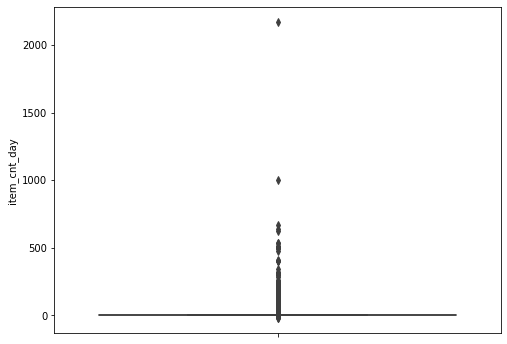

In [12]:
# outliers

plt.figure(figsize = (8,6))
sns.boxplot(sales_data["item_cnt_day"], orient="v");

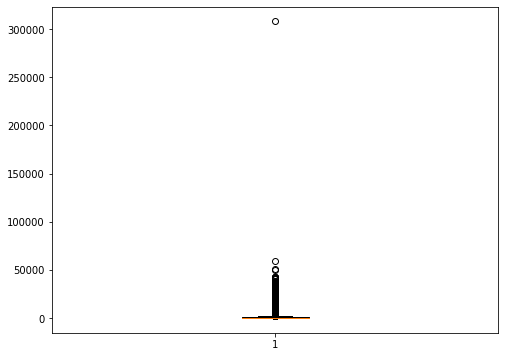

In [13]:
# outliers

plt.figure(figsize = (8,6))
plt.boxplot(sales_data["item_price"]);

In [14]:
# clean outliers from data

df = sales_data[(sales_data["item_cnt_day"] < 1000) & 
                 (sales_data["item_cnt_day"] >= 0) & 
                 (sales_data["item_price"] < 250000) &
                (sales_data["item_price"] > 0)]

In [15]:
df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0
5,2013-01-10,0,25,2564,349.00,1.0
...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0
2935845,2015-10-09,33,25,7460,299.00,1.0
2935846,2015-10-14,33,25,7459,349.00,1.0
2935847,2015-10-22,33,25,7440,299.00,1.0


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
date_block_num,2928489.0,14.569755,9.422948,0.00,7.0,14.0,23.0,33.0
shop_id,2928489.0,33.002974,16.225423,0.00,22.0,31.0,47.0,59.0
item_id,2928489.0,10200.279308,6324.395547,0.00,4477.0,9355.0,15691.0,22169.0
item_price,2928489.0,889.362494,1718.153478,0.07,249.0,399.0,999.0,59200.0
item_cnt_day,2928489.0,1.247256,2.217427,1.00,1.0,1.0,1.0,669.0


In [17]:
# dataframe from date, shop_id and count per day

count_df = df[["date" , "shop_id", "item_cnt_day"]]
count_df

,date,shop_id,item_cnt_day
0,2013-01-02,59,1.0
1,2013-01-03,25,1.0
3,2013-01-06,25,1.0
4,2013-01-15,25,1.0
5,2013-01-10,25,1.0
...,...,...,...
2935844,2015-10-10,25,1.0
2935845,2015-10-09,25,1.0
2935846,2015-10-14,25,1.0
2935847,2015-10-22,25,1.0


In [18]:
# rename columns for Prophet model

count_df.rename(columns={"date" : "ds", "item_cnt_day" : "y"}, inplace=True)
count_df

,ds,shop_id,y
0,2013-01-02,59,1.0
1,2013-01-03,25,1.0
3,2013-01-06,25,1.0
4,2013-01-15,25,1.0
5,2013-01-10,25,1.0
...,...,...,...
2935844,2015-10-10,25,1.0
2935845,2015-10-09,25,1.0
2935846,2015-10-14,25,1.0
2935847,2015-10-22,25,1.0


In [19]:
# dataframe group by for per month

count_df = count_df.set_index("ds").groupby([pd.Grouper(freq = "M"),
                                              "shop_id"]).sum().reset_index()
count_df

,ds,shop_id,y
0,2013-01-31,0,5578.0
1,2013-01-31,1,2947.0
2,2013-01-31,2,1151.0
3,2013-01-31,3,767.0
4,2013-01-31,4,2117.0
...,...,...,...
1577,2015-10-31,55,1972.0
1578,2015-10-31,56,1267.0
1579,2015-10-31,57,2319.0
1580,2015-10-31,58,1448.0


In [20]:
# filter dataframe for shop_id with less than 3 records to avoid errors as prophet only works for 2+ records by group

count_df = count_df.groupby(["shop_id"]).filter(lambda x: len(x) > 2)
count_df

,ds,shop_id,y
2,2013-01-31,2,1151.0
3,2013-01-31,3,767.0
4,2013-01-31,4,2117.0
5,2013-01-31,6,3699.0
6,2013-01-31,7,2498.0
...,...,...,...
1577,2015-10-31,55,1972.0
1578,2015-10-31,56,1267.0
1579,2015-10-31,57,2319.0
1580,2015-10-31,58,1448.0


In [21]:
# import Prophet model

from fbprophet import Prophet

In [22]:
final = pd.DataFrame(columns=["shop_id","ds","yhat"])

grouped = count_df.groupby("shop_id")
for g in grouped.groups:
    group = grouped.get_group(g)
    m = Prophet()
    m.fit(group)
    future = m.make_future_dataframe(1, freq = "M") # forecast next single month
    forecast = m.predict(future)
    # add a column with shop id
    forecast["shop_id"] = g
    # concat result with dataframe named final
    final = pd.concat([final, forecast], ignore_index=True)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

In [23]:
final

,shop_id,ds,yhat,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper
0,2,2013-01-31,1136.270002,681.533966,1054.065725,1217.828653,681.533966,681.533966,454.736036,454.736036,454.736036,454.736036,454.736036,454.736036,0.0,0.0,0.0
1,2,2013-02-28,585.905870,693.309379,501.866067,677.497105,693.309379,693.309379,-107.403508,-107.403508,-107.403508,-107.403508,-107.403508,-107.403508,0.0,0.0,0.0
2,2,2013-03-31,826.043454,706.346443,735.574425,911.705065,706.346443,706.346443,119.697012,119.697012,119.697012,119.697012,119.697012,119.697012,0.0,0.0,0.0
3,2,2013-04-30,573.451421,718.962956,486.361281,657.540221,718.962956,718.962956,-145.511536,-145.511536,-145.511536,-145.511536,-145.511536,-145.511536,0.0,0.0,0.0
4,2,2013-05-31,561.211170,732.000020,485.288163,648.113568,732.000020,732.000020,-170.788850,-170.788850,-170.788850,-170.788850,-170.788850,-170.788850,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1624,59,2015-07-31,950.458618,1079.855792,821.627630,1066.919071,1079.855792,1079.855792,-129.397174,-129.397174,-129.397174,-129.397174,-129.397174,-129.397174,0.0,0.0,0.0
1625,59,2015-08-31,1171.109163,1054.972362,1044.643242,1288.166749,1054.972362,1054.972362,116.136801,116.136801,116.136801,116.136801,116.136801,116.136801,0.0,0.0,0.0
1626,59,2015-09-30,915.882598,1030.891623,797.096281,1033.915161,1030.891623,1030.891623,-115.009025,-115.009025,-115.009025,-115.009025,-115.009025,-115.009025,0.0,0.0,0.0
1627,59,2015-10-31,865.929726,1006.008193,742.275540,992.185757,1006.008193,1006.008193,-140.078467,-140.078467,-140.078467,-140.078467,-140.078467,-140.078467,0.0,0.0,0.0


In [24]:
predicted_df = final[["ds", "shop_id", "yhat", "yhat_lower", "yhat_upper"]]
predicted_df

,ds,shop_id,yhat,yhat_lower,yhat_upper
0,2013-01-31,2,1136.270002,1054.065725,1217.828653
1,2013-02-28,2,585.905870,501.866067,677.497105
2,2013-03-31,2,826.043454,735.574425,911.705065
3,2013-04-30,2,573.451421,486.361281,657.540221
4,2013-05-31,2,561.211170,485.288163,648.113568
...,...,...,...,...,...
1624,2015-07-31,59,950.458618,821.627630,1066.919071
1625,2015-08-31,59,1171.109163,1044.643242,1288.166749
1626,2015-09-30,59,915.882598,797.096281,1033.915161
1627,2015-10-31,59,865.929726,742.275540,992.185757


## Visualization

In [26]:
import matplotlib.dates as mdates
import datetime as dt
import numpy as np

In [28]:
# min and max labels for x axes in graphic

left = dt.date(2013, 1, 31)
right = dt.date(2015, 11, 30)

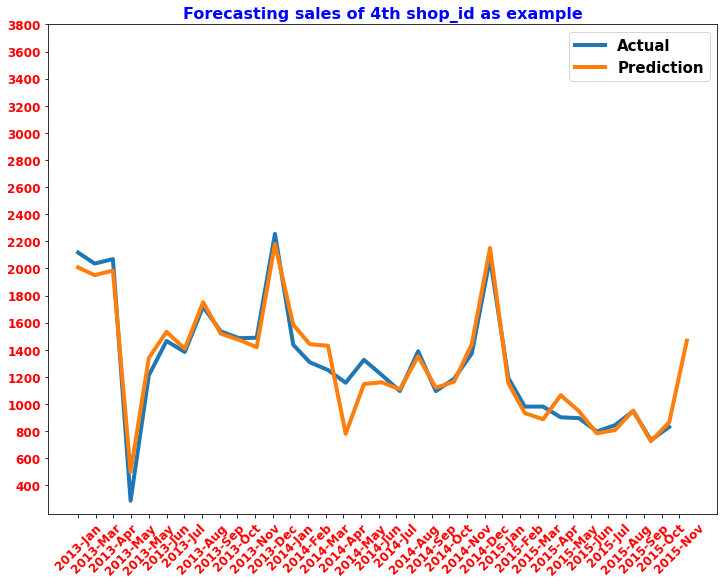

In [29]:
fig, ax = plt.subplots(figsize = (12,10))

ax.plot(count_df[count_df["shop_id"] == 4].drop("shop_id", axis = 1).set_index("ds"), label = "Actual")
ax.plot(predicted_df[predicted_df["shop_id"] == 4].drop(["shop_id",
                                                      "yhat_lower", 
                                                      "yhat_upper"], axis = 1).set_index("ds"), label = "Prediction")
leg_lines = ax.get_lines()
plt.setp(leg_lines, linewidth=4)

myFmt = mdates.DateFormatter("%Y-%b")
ax.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate(rotation = 45, ha = "center")

legend_properties = {"weight":"bold", "size" : 15}
ax.legend(prop = legend_properties)

plt.xticks(np.arange(left, right, 30), fontsize = 12, fontweight = "bold", color = "r")
ax.set_yticks(np.arange(400,4000,200))
plt.yticks(fontsize = 12, fontweight = "bold", color = "r")

plt.title("Forecasting sales of 4th shop_id as example", fontsize = 16, fontweight = "bold", color = "b")
plt.show()

In [30]:
# sort dataframe by date for split forecasted values

predicted_df = predicted_df.sort_values("ds", ignore_index=True)
predicted_df

,ds,shop_id,yhat,yhat_lower,yhat_upper
0,2013-01-31,2,1136.270002,1054.065725,1217.828653
1,2013-01-31,35,2151.004525,2061.629489,2249.526163
2,2013-01-31,37,2089.993607,1792.323702,2400.685248
3,2013-01-31,7,2485.608369,2400.195801,2571.788466
4,2013-01-31,38,1633.484527,1512.784434,1749.387469
...,...,...,...,...,...
1624,2015-11-30,55,4300.766663,3395.988888,5159.986509
1625,2015-11-30,39,881.818121,663.218723,1109.942999
1626,2015-11-30,44,977.436346,934.734968,1019.311036
1627,2015-11-30,9,-9866.919474,-10664.444847,-9108.684845


In [31]:
# forecasted values for November 2015

y_pred = predicted_df[predicted_df["ds"] > "2015-10-31"].reset_index(drop = True)
result = y_pred.merge(shops, on = "shop_id")
result

,ds,shop_id,yhat,yhat_lower,yhat_upper,shop_name
0,2015-11-30,52,1104.165292,989.443934,1223.215347,"Уфа ТК ""Центральный"""
1,2015-11-30,25,6664.272056,6245.642805,7067.420433,"Москва ТРК ""Атриум"""
2,2015-11-30,14,1134.130768,1003.771860,1267.160845,"Казань ТЦ ""ПаркХаус"" II"
3,2015-11-30,15,2094.152387,1978.662904,2211.231294,"Калуга ТРЦ ""XXI век"""
4,2015-11-30,26,1495.653844,1328.977694,1669.281886,"Москва ТЦ ""Ареал"" (Беляево)"
5,2015-11-30,10,720.364186,663.719769,777.863171,Жуковский ул. Чкалова 39м?
6,2015-11-30,12,4275.910955,4013.096398,4552.897332,Интернет-магазин ЧС
7,2015-11-30,24,2349.822218,1999.197675,2731.973770,"Москва ТК ""Буденовский"" (пав.К7)"
8,2015-11-30,5,1214.587830,1163.963008,1268.486767,"Вологда ТРЦ ""Мармелад"""
9,2015-11-30,42,5538.631522,5319.409989,5764.118194,"СПб ТК ""Невский Центр"""
